In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/IRAhandle_tweets_1.csv')


In [ ]:
# Display basic information about the dataset
print(data.info())

# Display a few sample rows
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243891 entries, 0 to 243890
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   external_author_id  243891 non-null  int64 
 1   author              243891 non-null  object
 2   content             243891 non-null  object
 3   region              243853 non-null  object
 4   language            243891 non-null  object
 5   publish_date        243891 non-null  object
 6   harvested_date      243891 non-null  object
 7   following           243891 non-null  int64 
 8   followers           243891 non-null  int64 
 9   updates             243891 non-null  int64 
 10  post_type           154592 non-null  object
 11  account_type        243891 non-null  object
 12  retweet             243891 non-null  int64 
 13  account_category    243891 non-null  object
 14  new_june_2018       243891 non-null  int64 
 15  alt_external_id     243891 non-null  int64 
 16  tw

In [ ]:
!pip install nltk gensim


In [ ]:
# Download NLTK stopwords resource
nltk.download('stopwords')


NameError: ignored

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!python -m nltk.downloader punkt
!python -m nltk.downloader stopwords


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Count the number of followers for each author
total_authors = data['author'].nunique()

# Display the result
print(f"Total number of unique authors: {total_authors}")
follower_counts = data.groupby('author')['followers'].max()

# Count the number of authors with fewer than 10 followers
fake_author_count = (follower_counts < 10).sum()

# Display the results
print(f"Number of authors with fewer than 10 followers: {fake_author_count}")


Total number of unique authors: 298
Number of authors with fewer than 10 followers: 43


In [ ]:
# Filter authors with fewer than 10 followers
fake_authors = follower_counts[follower_counts < 10].index

# Filter fake authors with Russian language tweets
fake_authors_russian_tweets = data[(data['author'].isin(fake_authors)) & (data['language'] == 'Russian')]

# Count the number of unique fake authors with Russian language tweets
unique_fake_authors_russian_tweets = fake_authors_russian_tweets['author'].nunique()

# Display the results
print(f"Number of fake authors with fewer than 10 followers: {len(fake_authors)}")
print(f"Number of unique fake authors with Russian language tweets: {unique_fake_authors_russian_tweets}")


Number of fake authors with fewer than 10 followers: 43
Number of unique fake authors with Russian language tweets: 4


In [ ]:
import pandas as pd

# List of CSV file paths
file_paths = ['/content/IRAhandle_tweets_1.csv', '/content/IRAhandle_tweets_2.csv','/content/IRAhandle_tweets_3.csv', '/content/IRAhandle_tweets_4.csv','/content/IRAhandle_tweets_5.csv','/content/IRAhandle_tweets_6.csv','/content/IRAhandle_tweets_7.csv','/content/IRAhandle_tweets_8.csv','/content/IRAhandle_tweets_9.csv','/content/IRAhandle_tweets_10.csv','/content/IRAhandle_tweets_11.csv','/content/IRAhandle_tweets_12.csv','/content/IRAhandle_tweets_13.csv']

# Initialize lists to store results
all_fake_authors = []
russian_fake_authors = []
russian_fake_authors_with_region = []


# Iterate through each CSV file
for file_path in file_paths:
    # Load the data
    data = pd.read_csv(file_path)

    # Your analysis code goes here
    # ...

    # Example: Get fake authors and Russian fake authors
    fake_authors = data.groupby('author')['followers'].max().index
    russian_fake_authors.extend(data[(data['author'].isin(fake_authors)) & (data['language'] == 'Russian')]['author'].unique())
    all_fake_authors.extend(fake_authors)
    russian_fake_authors_with_region.extend(data[(data['author'].isin(russian_fake_authors)) & (data['region'].notnull())]['author'].unique())


# Convert lists to sets to remove duplicates
all_fake_authors = list(set(all_fake_authors))
russian_fake_authors = list(set(russian_fake_authors))
russian_fake_authors_with_region = list(set(russian_fake_authors_with_region))


# Display the results
print(f"All fake authors: {len(all_fake_authors)}")
print(f"Russian fake authors: {len(russian_fake_authors)}")
print(f"Russian fake authors with region: {len(russian_fake_authors_with_region)}")



<ipython-input-10-8e06750fff8b>:15: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-10-8e06750fff8b>:15: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-10-8e06750fff8b>:15: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


All fake authors: 2843
Russian fake authors: 1369
Russian fake authors with region: 1369


In [ ]:
import pandas as pd

def analyze_fake_accounts(data):
    # Your analysis code goes here
    # Example: Get fake authors and Russian fake authors
    fake_authors = data.groupby('author')['followers'].max().index
    russian_fake_authors.extend(data[(data['author'].isin(fake_authors)) & (data['language'] == 'Russian')]['author'].unique())
    all_fake_authors.extend(fake_authors)
    russian_fake_authors_with_region.extend(data[(data['author'].isin(russian_fake_authors)) & (data['region'].notnull())]['author'].unique())

    # Check if fake authors have 'Unknown' region
    unknown_regions = data[(data['author'].isin(fake_authors)) & (data['region'] == 'Unknown')]['author'].unique()
    fake_authors_with_unknown_region.extend(unknown_regions)

# List of CSV file paths
file_paths = ['/content/IRAhandle_tweets_1.csv', '/content/IRAhandle_tweets_2.csv', '/content/IRAhandle_tweets_3.csv', '/content/IRAhandle_tweets_4.csv', '/content/IRAhandle_tweets_5.csv', '/content/IRAhandle_tweets_6.csv', '/content/IRAhandle_tweets_7.csv', '/content/IRAhandle_tweets_8.csv', '/content/IRAhandle_tweets_9.csv', '/content/IRAhandle_tweets_10.csv', '/content/IRAhandle_tweets_11.csv', '/content/IRAhandle_tweets_12.csv', '/content/IRAhandle_tweets_13.csv']

# Initialize lists to store results
all_fake_authors = []
russian_fake_authors = []
russian_fake_authors_with_region = []
fake_authors_with_unknown_region = []

# Iterate through each CSV file
for file_path in file_paths:
    # Load the data
    data = pd.read_csv(file_path)

    # Call the analysis function
    analyze_fake_accounts(data)

# Convert lists to sets to remove duplicates
all_fake_authors = list(set(all_fake_authors))
russian_fake_authors = list(set(russian_fake_authors))
russian_fake_authors_with_region = list(set(russian_fake_authors_with_region))
fake_authors_with_unknown_region = list(set(fake_authors_with_unknown_region))

# Display the results
print(f"All fake authors: {len(all_fake_authors)}")
print(f"Russian fake authors: {len(russian_fake_authors)}")
print(f"Russian fake authors with region: {len(russian_fake_authors_with_region)}")
print(f"Fake authors with 'Unknown' region: {len(fake_authors_with_unknown_region)}")


<ipython-input-11-609560ccd10a>:27: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-11-609560ccd10a>:27: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-11-609560ccd10a>:27: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


All fake authors: 2843
Russian fake authors: 1369
Russian fake authors with region: 1369
Fake authors with 'Unknown' region: 932


<ipython-input-12-29d0d7aef41a>:28: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-12-29d0d7aef41a>:28: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-12-29d0d7aef41a>:28: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


All fake authors: 2843
Russian fake authors: 1369
Russian fake authors with region: 1369
Fake authors with 'Unknown' region: 932


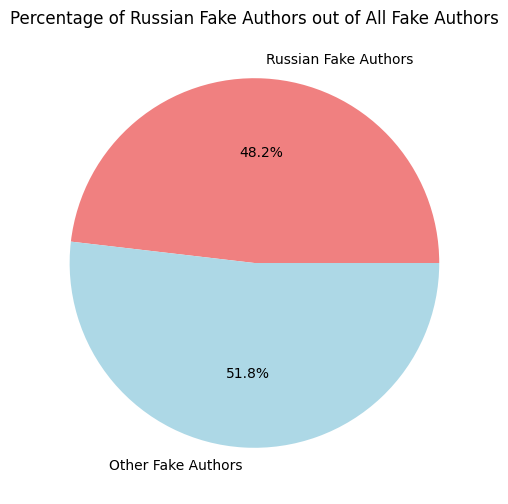

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_fake_accounts(data):
    # Your analysis code goes here
    # Example: Get fake authors and Russian fake authors
    fake_authors = data.groupby('author')['followers'].max().index
    russian_fake_authors.extend(data[(data['author'].isin(fake_authors)) & (data['language'] == 'Russian')]['author'].unique())
    all_fake_authors.extend(fake_authors)
    russian_fake_authors_with_region.extend(data[(data['author'].isin(russian_fake_authors)) & (data['region'].notnull())]['author'].unique())

    # Check if fake authors have 'Unknown' region
    unknown_regions = data[(data['author'].isin(fake_authors)) & (data['region'] == 'Unknown')]['author'].unique()
    fake_authors_with_unknown_region.extend(unknown_regions)

# List of CSV file paths
file_paths = ['/content/IRAhandle_tweets_1.csv', '/content/IRAhandle_tweets_2.csv', '/content/IRAhandle_tweets_3.csv', '/content/IRAhandle_tweets_4.csv', '/content/IRAhandle_tweets_5.csv', '/content/IRAhandle_tweets_6.csv', '/content/IRAhandle_tweets_7.csv', '/content/IRAhandle_tweets_8.csv', '/content/IRAhandle_tweets_9.csv', '/content/IRAhandle_tweets_10.csv', '/content/IRAhandle_tweets_11.csv', '/content/IRAhandle_tweets_12.csv', '/content/IRAhandle_tweets_13.csv']

# Initialize lists to store results
all_fake_authors = []
russian_fake_authors = []
russian_fake_authors_with_region = []
fake_authors_with_unknown_region = []

# Iterate through each CSV file
for file_path in file_paths:
    # Load the data
    data = pd.read_csv(file_path)

    # Call the analysis function
    analyze_fake_accounts(data)

# Convert lists to sets to remove duplicates
all_fake_authors = list(set(all_fake_authors))
russian_fake_authors = list(set(russian_fake_authors))
russian_fake_authors_with_region = list(set(russian_fake_authors_with_region))
fake_authors_with_unknown_region = list(set(fake_authors_with_unknown_region))

# Display the results
print(f"All fake authors: {len(all_fake_authors)}")
print(f"Russian fake authors: {len(russian_fake_authors)}")
print(f"Russian fake authors with region: {len(russian_fake_authors_with_region)}")
print(f"Fake authors with 'Unknown' region: {len(fake_authors_with_unknown_region)}")

# Plot percentage of Russian fake accounts out of all fake accounts
if len(all_fake_authors) > 0:
    plt.figure(figsize=(6, 6))
    plt.pie([len(russian_fake_authors) / len(all_fake_authors), (len(all_fake_authors) - len(russian_fake_authors)) / len(all_fake_authors)],
            labels=['Russian Fake Authors', 'Other Fake Authors'],
            autopct='%1.1f%%',
            colors=['lightcoral', 'lightblue'])
    plt.title('Percentage of Russian Fake Authors out of All Fake Authors')
    plt.show()


<ipython-input-41-4abe23ed9fc5>:28: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-41-4abe23ed9fc5>:28: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-41-4abe23ed9fc5>:28: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


All fake authors: 1944
Russian fake authors: 946
Russian fake authors with region: 946
Fake authors with 'Unknown' region: 641


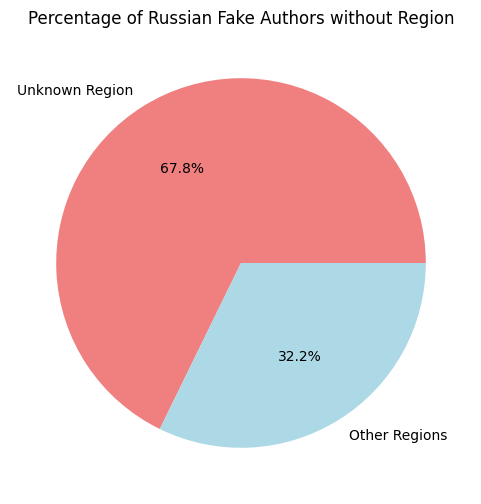

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_fake_accounts(data):
    # Your analysis code goes here
    # Example: Get fake authors and Russian fake authors
    fake_authors = data.groupby('author')['followers'].max().index
    russian_fake_authors.extend(data[(data['author'].isin(fake_authors)) & (data['language'] == 'Russian')]['author'].unique())
    all_fake_authors.extend(fake_authors)
    russian_fake_authors_with_region.extend(data[(data['author'].isin(russian_fake_authors)) & (data['region'].notnull())]['author'].unique())

    # Check if fake authors have 'Unknown' region
    unknown_regions = data[(data['author'].isin(fake_authors)) & (data['region'] == 'Unknown')]['author'].unique()
    fake_authors_with_unknown_region.extend(unknown_regions)

# List of CSV file paths
file_paths = ['/content/IRAhandle_tweets_1.csv', '/content/IRAhandle_tweets_2.csv', '/content/IRAhandle_tweets_3.csv', '/content/IRAhandle_tweets_4.csv', '/content/IRAhandle_tweets_5.csv', '/content/IRAhandle_tweets_6.csv', '/content/IRAhandle_tweets_7.csv', '/content/IRAhandle_tweets_8.csv', '/content/IRAhandle_tweets_9.csv', '/content/IRAhandle_tweets_10.csv', '/content/IRAhandle_tweets_11.csv', '/content/IRAhandle_tweets_12.csv', '/content/IRAhandle_tweets_13.csv']

# Initialize lists to store results
all_fake_authors = []
russian_fake_authors = []
russian_fake_authors_with_region = []
fake_authors_with_unknown_region = []

# Iterate through each CSV file
for file_path in file_paths:
    # Load the data
    data = pd.read_csv(file_path)

    # Call the analysis function
    analyze_fake_accounts(data)

# Convert lists to sets to remove duplicates
all_fake_authors = list(set(all_fake_authors))
russian_fake_authors = list(set(russian_fake_authors))
russian_fake_authors_with_region = list(set(russian_fake_authors_with_region))
fake_authors_with_unknown_region = list(set(fake_authors_with_unknown_region))

# Display the results
print(f"All fake authors: {len(all_fake_authors)}")
print(f"Russian fake authors: {len(russian_fake_authors)}")
print(f"Russian fake authors with region: {len(russian_fake_authors_with_region)}")
print(f"Fake authors with 'Unknown' region: {len(fake_authors_with_unknown_region)}")

# Plot percentage of Russian fake accounts without region
if len(russian_fake_authors) > 0:
    plt.figure(figsize=(6, 6))
    plt.pie([len(fake_authors_with_unknown_region) / len(russian_fake_authors), (len(russian_fake_authors) - len(fake_authors_with_unknown_region)) / len(russian_fake_authors)],
            labels=['Unknown Region', 'Other Regions'],
            autopct='%1.1f%%',
            colors=['lightcoral', 'lightblue'])
    plt.title('Percentage of Russian Fake Authors without Region')
    plt.show()


In [ ]:
import pandas as pd

# List of CSV file paths
file_paths = ['/content/IRAhandle_tweets_1.csv', '/content/IRAhandle_tweets_2.csv', '/content/IRAhandle_tweets_3.csv', '/content/IRAhandle_tweets_4.csv', '/content/IRAhandle_tweets_5.csv', '/content/IRAhandle_tweets_6.csv', '/content/IRAhandle_tweets_7.csv', '/content/IRAhandle_tweets_8.csv', '/content/IRAhandle_tweets_9.csv', '/content/IRAhandle_tweets_10.csv', '/content/IRAhandle_tweets_11.csv', '/content/IRAhandle_tweets_12.csv', '/content/IRAhandle_tweets_13.csv']

# Initialize a variable to store the total count of Trump-related tweets
total_trump_tweets = 0

# Iterate through each CSV file
for file_path in file_paths:
    # Load the data
    data = pd.read_csv(file_path)

    # Filter tweets mentioning 'Trump' before the U.S. presidential election
    trump_tweets = data[(data['content'].str.contains('Trump', case=False)) & (data['publish_date'] < '11/08/2016')]

    # Update the total count
    total_trump_tweets += len(trump_tweets)

# Display the total count of Trump-related tweets
print(f"Total number of tweets mentioning 'Trump' before the U.S. presidential election: {total_trump_tweets}")


<ipython-input-13-a2500e8e174c>:12: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-13-a2500e8e174c>:12: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-13-a2500e8e174c>:12: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Total number of tweets mentioning 'Trump' before the U.S. presidential election: 32772


In [ ]:
import pandas as pd

# List of CSV file paths
file_paths = ['/content/IRAhandle_tweets_1.csv', '/content/IRAhandle_tweets_2.csv', '/content/IRAhandle_tweets_3.csv', '/content/IRAhandle_tweets_4.csv', '/content/IRAhandle_tweets_5.csv', '/content/IRAhandle_tweets_6.csv', '/content/IRAhandle_tweets_7.csv', '/content/IRAhandle_tweets_8.csv', '/content/IRAhandle_tweets_9.csv', '/content/IRAhandle_tweets_10.csv', '/content/IRAhandle_tweets_11.csv', '/content/IRAhandle_tweets_12.csv', '/content/IRAhandle_tweets_13.csv']

# Initialize a set to store unique accounts mentioning 'Trump'
unique_trump_accounts = set()

# Iterate through each CSV file
for file_path in file_paths:
    # Load the data
    data = pd.read_csv(file_path)

    # Filter tweets mentioning 'Trump' before the U.S. presidential election
    trump_tweets = data[(data['content'].str.contains('Trump', case=False)) & (data['publish_date'] < '11/08/2016')]

    # Update the set of unique accounts
    unique_trump_accounts.update(trump_tweets['author'].unique())

# Display the total number of unique accounts tweeting about 'Trump'
print(f"Total number of unique accounts mentioning 'Trump' before the U.S. presidential election: {len(unique_trump_accounts)}")


<ipython-input-43-e14c2f8b2549>:12: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-43-e14c2f8b2549>:12: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-43-e14c2f8b2549>:12: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Total number of unique accounts mentioning 'Trump' before the U.S. presidential election: 403


In [ ]:
import pandas as pd

# List of CSV file paths
file_paths = ['/content/IRAhandle_tweets_1.csv', '/content/IRAhandle_tweets_2.csv', '/content/IRAhandle_tweets_3.csv', '/content/IRAhandle_tweets_4.csv', '/content/IRAhandle_tweets_5.csv', '/content/IRAhandle_tweets_6.csv', '/content/IRAhandle_tweets_7.csv', '/content/IRAhandle_tweets_8.csv', '/content/IRAhandle_tweets_9.csv', '/content/IRAhandle_tweets_10.csv', '/content/IRAhandle_tweets_11.csv', '/content/IRAhandle_tweets_12.csv', '/content/IRAhandle_tweets_13.csv']

# Initialize a set to store unique accounts mentioning 'Trump'
unique_trump_accounts = set()

# Initialize counters
unknown_region_count = 0
russian_region_count = 0

# Iterate through each CSV file
for file_path in file_paths:
    # Load the data
    data = pd.read_csv(file_path)

    # Filter tweets mentioning 'Trump' before the U.S. presidential election
    trump_tweets = data[(data['content'].str.contains('Trump', case=False)) & (data['publish_date'] < '11/08/2016')]

    # Update the set of unique accounts
    unique_trump_accounts.update(trump_tweets['author'].unique())

# Check region for each unique account
for account in unique_trump_accounts:
    account_data = data[data['author'] == account]
    if not account_data.empty:
        region = account_data['region'].iloc[0]  # Assuming region is the same for all tweets of an account
        if pd.isnull(region) or region == 'Unknown':
            unknown_region_count += 1
        elif region == 'Russia':
            russian_region_count += 1

# Display the results
print(f"Total number of unique accounts mentioning 'Trump' before the U.S. presidential election: {len(unique_trump_accounts)}")
print(f"Number of accounts with 'Unknown' or 'Null' region: {unknown_region_count}")
print(f"Number of accounts from Russia: {russian_region_count}")


<ipython-input-45-676795d39dce>:16: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-45-676795d39dce>:16: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-45-676795d39dce>:16: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Total number of unique accounts mentioning 'Trump' before the U.S. presidential election: 403
Number of accounts with 'Unknown' or 'Null' region: 0
Number of accounts from Russia: 0


In [ ]:
import pandas as pd

# List of CSV file paths
file_paths = ['/content/IRAhandle_tweets_1.csv', '/content/IRAhandle_tweets_2.csv', '/content/IRAhandle_tweets_3.csv', '/content/IRAhandle_tweets_4.csv', '/content/IRAhandle_tweets_5.csv', '/content/IRAhandle_tweets_6.csv', '/content/IRAhandle_tweets_7.csv', '/content/IRAhandle_tweets_8.csv', '/content/IRAhandle_tweets_9.csv', '/content/IRAhandle_tweets_10.csv', '/content/IRAhandle_tweets_11.csv', '/content/IRAhandle_tweets_12.csv', '/content/IRAhandle_tweets_13.csv']

# Initialize a set to store unique accounts mentioning the U.S. 2016 presidential election
unique_election_accounts = set()

# Initialize counters
unknown_region_count = 0
russian_region_count = 0

# Iterate through each CSV file
for file_path in file_paths:
    # Load the data
    data = pd.read_csv(file_path)

    # Filter tweets mentioning the U.S. 2016 presidential election
    election_tweets = data[(data['content'].str.contains('election', case=False)) & (data['publish_date'] < '11/08/2016')]

    # Update the set of unique accounts
    unique_election_accounts.update(election_tweets['author'].unique())

# Check region for each unique account
for account in unique_election_accounts:
    account_data = data[data['author'] == account]
    if not account_data.empty:
        region = account_data['region'].iloc[0]  # Assuming region is the same for all tweets of an account
        if pd.isnull(region) or region == 'Unknown':
            unknown_region_count += 1
        elif region == 'Russia':
            russian_region_count += 1

# Display the results
print(f"Total number of unique accounts mentioning the U.S. 2016 presidential election: {len(unique_election_accounts)}")
print(f"Number of accounts with 'Unknown' or 'Null' region: {unknown_region_count}")
print(f"Number of accounts from Russia: {russian_region_count}")


<ipython-input-14-0d0d821bd76b>:16: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-14-0d0d821bd76b>:16: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-14-0d0d821bd76b>:16: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Total number of unique accounts mentioning the U.S. 2016 presidential election: 337
Number of accounts with 'Unknown' or 'Null' region: 0
Number of accounts from Russia: 0


In [ ]:
import nltk
nltk.download('stopwords')

# Get English stop words
stop_words = set(nltk.corpus.stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Download NLTK stop words
nltk.download('stopwords')

# Get English stop words
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

def visualize_spectral_clustering(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Take a smaller subset for faster experimentation
    data_subset = data.sample(frac=0.1, random_state=42)

    # Preprocess text data
    data_subset['processed_text'] = data_subset['content'].apply(preprocess_text)

    # Train Word2Vec embeddings
    model = Word2Vec(sentences=data_subset['processed_text'], vector_size=50, window=5, min_count=1, workers=4)

    # Create a matrix of word embeddings
    word_matrix = model.wv[model.wv.key_to_index]

    # Reduce dimensionality using PCA
    pca = PCA(n_components=20)  # Adjust the number of components
    word_matrix_pca = pca.fit_transform(word_matrix)

    # Perform spectral clustering
    n_clusters = 3  # You can adjust this based on your dataset
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42).fit(word_matrix_pca)

    # Visualize the clustering using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(word_matrix_pca)

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    for i in range(n_clusters):
        plt.scatter(tsne_result[clustering.labels_ == i, 0], tsne_result[clustering.labels_ == i, 1], label=f'Cluster {i}')

    plt.title('Spectral Clustering Visualization')
    plt.legend()
    plt.show()

# Example usage:
file_path = '/content/IRAhandle_tweets_10.csv'
visualize_spectral_clustering(file_path)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-1-8b8f3786a154>:23: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
!pip install textblob


In [ ]:
pip install pandas nltk gensim scikit-learn matplotlib textblob


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 665 with accuracies 
[2.81390619e-15 2.50112112e-05 1.47994932e-05]
not reaching the requested tolerance 1.4901161193847656e-05.
Use iteration 584 instead with accuracy 
8.170446770486973e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[2.09201702e-15 6.18502005e-06 1.83263203e-05]
not reaching the requested tolerance 1.4901161193847656e-05.
  _, diffusion_map = lobpcg(


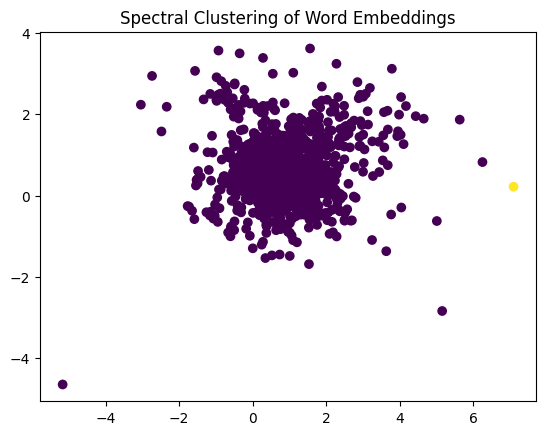

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from textblob import TextBlob

def infer_delimiter(file_path):
    with open(file_path, 'r') as file:
        line = file.readline()

        for delimiter in [',', '\t', ';']:
            if len(line.split(delimiter)) > 1:
                return delimiter

    return ','

dataset_paths = ["/content/IRAhandle_tweets_1.csv",
                 "/content/IRAhandle_tweets_2.csv"]

delimiter = infer_delimiter(dataset_paths[0])


dfs = [pd.read_csv(file, delimiter=delimiter) for file in dataset_paths]
df = pd.concat(dfs, ignore_index=True)


df['word_count'] = df['content'].apply(lambda x: len(word_tokenize(str(x))) if pd.notnull(x) else 0)
df['sentence_count'] = df['content'].apply(lambda x: len(TextBlob(str(x)).sentences) if pd.notnull(x) else 0)


column_name = 'content'  # Update this with the correct column name


if column_name not in df.columns:
    raise KeyError(f"'{column_name}' column not found in the dataset.")


corpus = [word_tokenize(str(text).lower()) for text in df[column_name] if pd.notnull(text)]
stop_words = set(stopwords.words('english'))
corpus = [[word for word in doc if word.isalnum() and word not in stop_words] for doc in corpus]


model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

embeddings = model.wv.vectors
subset_embeddings = embeddings[:1000]  # Adjust the subset size as needed
cluster_model = SpectralClustering(n_clusters=2, random_state=42)
clusters = cluster_model.fit_predict(subset_embeddings)

plt.scatter(subset_embeddings[:, 0], subset_embeddings[:, 1], c=clusters, cmap='viridis')
plt.title('Spectral Clustering of Word Embeddings')
plt.show()


In [ ]:
# Step 1: Data Cleaning and Preprocessing
import pandas as pd

# Assuming df is your DataFrame containing the dataset
df = pd.read_csv('/content/IRAhandle_tweets_1.csv')
text_data = df['content'].tolist()

# Perform text cleaning (you may need more advanced cleaning based on your data)
cleaned_text_data = [text.lower().replace('\n', ' ') for text in text_data]

# Step 2: Text Representation with Word Embeddings
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Tokenize the text
tokenized_text = [word_tokenize(text) for text in cleaned_text_data]

# Train Word2Vec embeddings
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Create document embeddings
document_embeddings = [word2vec_model.wv[text] for text in tokenized_text]

# Step 3: Subset Selection for Spectral Clustering
import random

# Randomly select a subset for clustering
subset_size = min(10000, len(document_embeddings))  # Adjust the subset size based on available memory
random_subset_indices = random.sample(range(len(document_embeddings)), subset_size)
subset_embeddings = [document_embeddings[i] for i in random_subset_indices]

# Step 4: Spectral Clustering
from sklearn.cluster import SpectralClustering

# Specify the number of clusters (you may need to tune this parameter)
num_clusters = 5
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors')
cluster_labels = spectral_clustering.fit_predict(subset_embeddings)

# Step 5: Visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(subset_embeddings)

# Scatter plot of clusters
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Spectral Clustering Visualization')
plt.show()

# Step 6: Bias Analysis
# Analyze the clusters and compare with pre-trained embeddings to identify bias patterns


ValueError: ignored